In [ ]:
import os
import pandas as pd
from collections import defaultdict

PATH = os.path.join(os.getcwd(), 'logs')
filename_list = ['.'.join(tokens[:-1]) 
                    for name in os.listdir(PATH) 
                    if (tokens := name.split('.')) and len(tokens) > 2]
fileinfo_list = [name.split('_')[:2] for name in filename_list]
list(map(lambda x:x.split('_')[:2], filename_list))

cases = defaultdict(list)

for (algo, env), filename in zip(fileinfo_list, filename_list):
    load_path = os.path.join(PATH, filename) + '.csv'
    save_path = os.path.join(PATH, f'{algo}_{env}') + '.csv'
    cases[save_path].append(load_path)

count = defaultdict(int)

for save_path in cases:
    outp = pd.DataFrame()
    
    for load_path in cases[save_path]:
        print(save_path)
        print(f'로드: {load_path}')
        inp = pd.read_csv(load_path)
        last_epi = inp['episode'].max()
        inp['episode'] += count[save_path]
        print(count[save_path])
        count[save_path] += last_epi + 1
        
        outp = pd.concat([outp, inp])

    if os.path.isfile(save_path):
        print(f'기존 로그 제거: {save_path}')
        os.remove(save_path)
    outp.to_csv(save_path, index=False, encoding='utf-8')
    

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

def draw_corr_mat_heatmap(dataframe, *, figsize=(10, 10), drop_columns=[]):
    
    dataframe.drop(columns=drop_columns, inplace=True) # 지정된 열을 삭제
    corr_df = dataframe.corr() # 쌍별 상관관계 행렬
    fig, ax = plt.subplots(figsize=figsize)

    # 원소가 1인 상부삼각행렬
    masked = np.zeros_like(corr_df, dtype=np.bool)
    masked[np.triu_indices_from(masked)] = True

    sns.heatmap(
        corr_df,
        cmap=sns.color_palette("RdBu", 10),
        annot=True,  # 실제 값을 표시한다
        mask=masked,  # 숨길 위치 = True
        linewidths=.5,  # 셀의 경계선 너비
        cbar_kws={"shrink": .5},  # 컬러바 크기 설정
        vmin=-1, # 컬러바 범위 설정 [-1, 1]
        vmax=1  
    )

    plt.title('Correation Matrix', fontsize=20)
    plt.show()

def visualize(df, *, figsize=(5, 5), graph_drop_cols=['reward', 'done', 'step'], corr_drop_cols=['reward', 'done', 'action', 'episode', 'step']):
    sns.set_palette("pastel")
    plt.figure(figsize=figsize) # 피규어 생성
    df_group_by = df.groupby(by='episode') # 'episode' 레이블로 그룹화
    max_steps = df_group_by["step"].max() # 각 그룹에서 'step' 레이블의 max를 구함
    max_step_df = pd.DataFrame(max_steps) # step의 max값으로 df를 만든다.
    max_step_df.reset_index(inplace=True)

    plt.title("max step histogram")
    sns.histplot(data=max_step_df, x=max_step_df.step) # 히스토그램 출력
    plt.show()

    draw_corr_mat_heatmap(df, drop_columns=corr_drop_cols) # 상관관계행렬 heatmap 출력

    # 그래프
    col_names = [col for col in df.columns.to_list() if col not in set(graph_drop_cols)]

    for col in col_names:
        fig, ax = plt.subplots(figsize=figsize)
        sns.histplot(x=df[col])

              step      episode  reward       action  Cart Position  \
count  1500.000000  1500.000000  1500.0  1500.000000    1500.000000   
mean    249.500000     1.000000     1.0     0.500000       1.001314   
std     144.385415     0.816769     0.0     0.500167       0.534487   
min       0.000000     0.000000     1.0     0.000000      -0.046910   
25%     124.750000     0.000000     1.0     0.000000       0.559586   
50%     249.500000     1.000000     1.0     0.500000       1.108466   
75%     374.250000     2.000000     1.0     1.000000       1.495854   
max     499.000000     2.000000     1.0     1.000000       1.685474   

       Cart Velocity   Pole Angle  Pole Angular Velocity  
count    1500.000000  1500.000000            1500.000000  
mean        0.162699    -0.000037              -0.000485  
std         0.157923     0.012588               0.190106  
min        -0.408979    -0.032922              -0.471732  
25%        -0.011072    -0.005729              -0.133786  
50%   

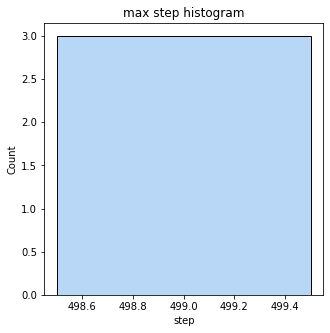

C:\Users\kuro1\AppData\Local\Temp/ipykernel_5720/1371506168.py:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  masked = np.zeros_like(corr_df, dtype=np.bool)


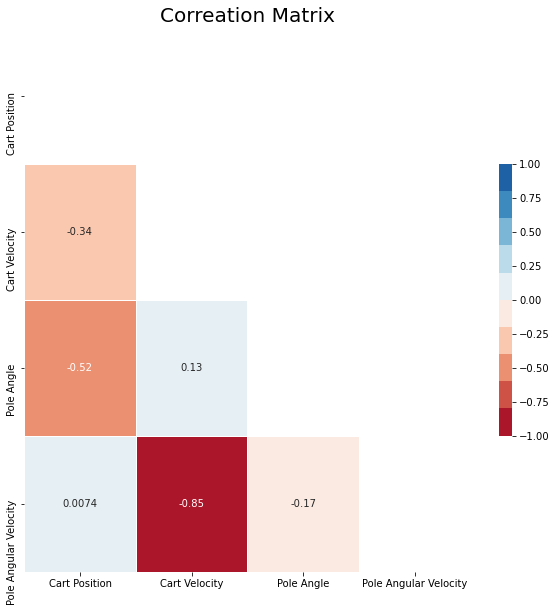

       Cart Position  Cart Velocity   Pole Angle  Pole Angular Velocity
count    1500.000000    1500.000000  1500.000000            1500.000000
mean        1.001314       0.162699    -0.000037              -0.000485
std         0.534487       0.157923     0.012588               0.190106
min        -0.046910      -0.408979    -0.032922              -0.471732
25%         0.559586      -0.011072    -0.005729              -0.133786
50%         1.108466       0.163831    -0.001905              -0.003091
75%         1.495854       0.343637     0.002100               0.161294
max         1.685474       0.561295     0.064462               0.623775


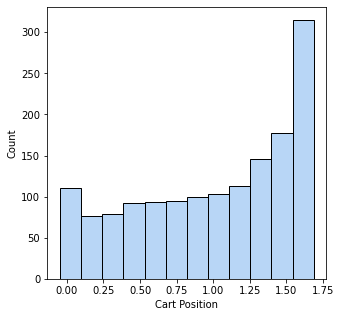

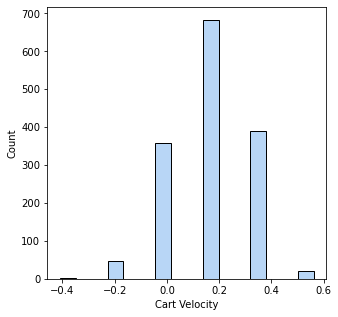

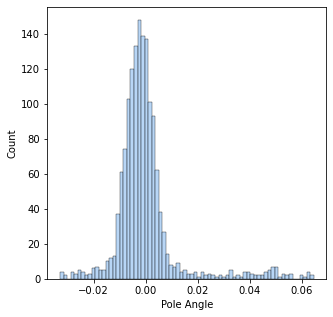

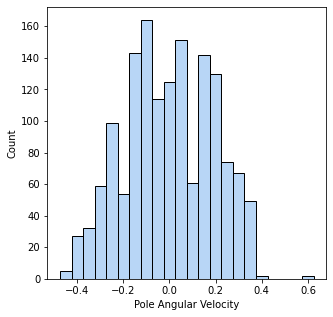

In [5]:
from collections import defaultdict

def load_log(filename):
    df = pd.read_csv(f"./logs/{filename}.csv")
    env_name = filename.split('_')[1].split('-')[0]
    if env_name == 'CartPole':
        df.rename(columns = {
            'state0' : 'Cart Position',
            'state1' : 'Cart Velocity',
            'state2' : 'Pole Angle',
            'state3' : 'Pole Angular Velocity'
            }, inplace = True)
    elif env_name == 'LunarLander':
        df.rename(columns = {
            'state0' : 'Horizontal Coord',
            'state1' : 'Vertical Coord',
            'state2' : 'Horizontal Speed',
            'state3' : 'Vertical Speed',
            'state4' : 'Angle',
            'state5' : 'Angular Speed',
            'state6' : 'First Leg',
            'state7' : 'Second Leg'
            }, inplace = True)
    return df

def print_statistics():
    cases = dict()
    cases["CartPole-v1"] = [
        "DQN_CartPole-v1_train=False_intvl=1_rwdscl=1.0_node=128_lRate=0.0005_gma=0.98_nBuf=50000_nBat=32_nStrt=2000_updIntvl=10_1635102083"]
    # cases["LunarLander-v2"] = [
    #     "Reinforce_LunarLander-v2_train=False_intvl=1_rwdscl=1.0_node=256_lRate=0.0025_gma=0.98_1634919662",
    #     "ActorCritic_LunarLander-v2_train=False_intvl=1_rwdscl=1.0_node=256_lRate=0.0025_gma=0.98_nRoll=20_1634920427",
    #     "DQN_LunarLander-v2_train=False_intvl=1_rwdscl=1.0_node=256_lRate=0.0005_gma=0.98_nBuf=100000_nBat=64_nStrt=10000_updIntvl=20_1634920703",
    #     "DDQN_LunarLander-v2_train=False_intvl=1_rwdscl=1.0_node=256_lRate=0.0005_gma=0.98_nBuf=100000_nBat=64_nStrt=10000_updIntvl=20_1634921263"]

    for env in cases:
        print(f'\n\t<<{env}>>')
        feature_data_list = defaultdict(pd.DataFrame)
        for filename in cases[env]:
            print(filename)
            algo = filename.split('_')[0]
            df = load_log(filename)
            for col in df.columns:
                sr = df[[col]].squeeze()
                sr.rename(algo, inplace=True)
                feature_data_list[col] = pd.concat([feature_data_list[col], sr], axis=1)
        for feature in feature_data_list:
            print(f'\n\t<{feature}>')
            df_stats = feature_data_list[feature].describe()
            print(df_stats)

def main():
    df = load_log('DQN_CartPole-v1_train=False_intvl=1_rwdscl=1.0_node=128_lRate=0.0005_gma=0.98_nBuf=50000_nBat=32_nStrt=2000_updIntvl=10_1635102083')
    print(df.describe())
    visualize(df)

main()

In [ ]:
df.groupby(by='episode')["step"].describe()

In [ ]:
step_value = pd.DataFrame(df.groupby(by='episode')["step"].max())
step_value.reset_index(inplace=True)
step_value

In [ ]:
sns.histplot(data=step_value,x=step_value.step,bins=5)

In [ ]:
plt.title("last step hist")
sns.histplot(x=df["step"])